<a href="https://colab.research.google.com/github/motahareh-ehsani/MakeAIDetectFish/blob/main/MAakeAIFishWithResult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q /content/my_dataset.zip -d /content/

In [ ]:
import os
import random
import shutil
from pathlib import Path

# Paths
base_path = Path("/content/my_dataset")
images_path = base_path / "images"
labels_path = base_path / "labels"

# Output folders
for split in ["train", "val"]:
    (base_path / "images" / split).mkdir(parents=True, exist_ok=True)
    (base_path / "labels" / split).mkdir(parents=True, exist_ok=True)

# Get all image files
image_files = list(images_path.glob("*.jpg")) + list(images_path.glob("*.jpeg")) + list(images_path.glob("*.png"))

# Shuffle
random.shuffle(image_files)

# Train/val split (80% train, 20% val)
split_idx = int(len(image_files) * 0.8)
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

def move_files(file_list, split):
    for img_path in file_list:
        # Move image
        shutil.copy(img_path, base_path / "images" / split)

        # Move label if exists
        label_file = labels_path / (img_path.stem + ".txt")
        if label_file.exists():
            shutil.copy(label_file, base_path / "labels" / split)

# Run splitting
move_files(train_files, "train")
move_files(val_files, "val")

print("✅ Split complete.")
print(f"Train: {len(train_files)} images")
print(f"Val: {len(val_files)} images")


#knowingmissingnumbersoflabeling

train_images = list((base_path / "images" / "train").glob("*.*"))
val_images = list((base_path / "images" / "val").glob("*.*"))

missing_train = [img.name for img in train_images if not (base_path / "labels/train" / (img.stem + ".txt")).exists()]
missing_val = [img.name for img in val_images if not (base_path / "labels/val" / (img.stem + ".txt")).exists()]

print(f"Train images: {len(train_images)}, Train labels: {len(train_images) - len(missing_train)}")
print(f"Val images: {len(val_images)}, Val labels: {len(val_images) - len(missing_val)}")

print(f"⚠️ Missing labels in train: {len(missing_train)}")
print(f"⚠️ Missing labels in val: {len(missing_val)}")


✅ Split complete.
Train: 272 images
Val: 69 images
Train images: 272, Train labels: 77
Val images: 69, Val labels: 22
⚠️ Missing labels in train: 195
⚠️ Missing labels in val: 47


In [ ]:
import os
from pathlib import Path

base_path = Path("/content/my_dataset")

def clean_split(split):
    img_dir = base_path / "images" / split
    lbl_dir = base_path / "labels" / split
    removed = 0
    for img in img_dir.glob("*.*"):
        if not (lbl_dir / (img.stem + ".txt")).exists():
            os.remove(img)
            removed += 1
    print(f"Removed {removed} unlabeled images from {split}")

clean_split("train")
clean_split("val")


Removed 195 unlabeled images from train
Removed 47 unlabeled images from val


In [ ]:
train_images = list((base_path / "images" / "train").glob("*.*"))
val_images = list((base_path / "images" / "val").glob("*.*"))

missing_train = [img.name for img in train_images if not (base_path / "labels/train" / (img.stem + ".txt")).exists()]
missing_val = [img.name for img in val_images if not (base_path / "labels/val" / (img.stem + ".txt")).exists()]

print(f"Train images: {len(train_images)}, Train labels: {len(train_images) - len(missing_train)}")
print(f"Val images: {len(val_images)}, Val labels: {len(val_images) - len(missing_val)}")

print(f"⚠️ Missing labels in train: {len(missing_train)}")
print(f"⚠️ Missing labels in val: {len(missing_val)}")


Train images: 77, Train labels: 77
Val images: 22, Val labels: 22
⚠️ Missing labels in train: 0
⚠️ Missing labels in val: 0


In [ ]:
import os

# Check the first few label files
label_dir = '/content/my_dataset/labels/train'
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

print("Sample label file contents:")
for label_file in label_files[:5]:  # Check first 5 files
    file_path = os.path.join(label_dir, label_file)
    print(f"\n{label_file}:")
    with open(file_path, 'r') as f:
        content = f.read().strip()
        print(f"'{content}'")

    # Stop if we find non-empty files
    if content:
        break

Sample label file contents:

frame_0020.txt:
'1 0.600394 0.400262 0.649606 0.489501 0.708661 0.589239 0.782480 0.657480 0.825787 0.717848 0.821850 0.814961 0.783465 0.839895 0.757874 0.833333 0.709646 0.707349 0.658465 0.582677 0.589567 0.454068 0.571850 0.423885'


In [ ]:
import os
from collections import defaultdict

# Configuration
CLASS_NAME = 'fish'
CLASS_ID = 0   # Using class ID 0 (YOLO standard)
DATASET_ROOT = '/content/my_dataset'

# ========== 0. Convert Class IDs from 1 to 0 ==========
def convert_class_ids(label_dir, old_id=1, new_id=0):
    """Convert all class IDs from old_id to new_id"""
    print(f"Converting class IDs from {old_id} to {new_id} in {label_dir}")

    for label_file in os.listdir(label_dir):
        if not label_file.endswith('.txt'):
            continue

        file_path = os.path.join(label_dir, label_file)
        new_lines = []
        changed = False

        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts and int(parts[0]) == old_id:
                    parts[0] = str(new_id)  # Change class ID
                    new_lines.append(' '.join(parts))
                    changed = True
                else:
                    new_lines.append(line.strip())

        # Write back with updated class ID if changes were made
        if changed:
            with open(file_path, 'w') as f:
                f.write('\n'.join(new_lines))

# Convert all labels from class 1 to class 0
convert_class_ids(os.path.join(DATASET_ROOT, 'labels', 'train'), old_id=1, new_id=0)
convert_class_ids(os.path.join(DATASET_ROOT, 'labels', 'val'), old_id=1, new_id=0)

# ========== 1. Label Analysis ==========
def analyze_labels(label_path, set_name):
    """Analyze label files and count class instances."""
    class_counts = defaultdict(int)

    if not os.path.exists(label_path):
        raise FileNotFoundError(f"{set_name} labels not found at: {label_path}")

    print(f"\nAnalyzing {set_name} labels in: {label_path}")
    for label_file in os.listdir(label_path):
        if not label_file.endswith('.txt'):
            continue

        with open(os.path.join(label_path, label_file)) as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:  # class_id + at least 4 coords
                    class_id = int(parts[0])
                    class_counts[class_id] += 1

    return class_counts

# Analyze both train and val sets
train_counts = analyze_labels(os.path.join(DATASET_ROOT, 'labels', 'train'), 'Train')
val_counts = analyze_labels(os.path.join(DATASET_ROOT, 'labels', 'val'), 'Validation')

# ========== 2. Class Verification ==========
print("\nClass Distribution Summary:")
print(f"Train set: Class {CLASS_ID} instances = {train_counts.get(CLASS_ID, 0)}")
print(f"Val set: Class {CLASS_ID} instances = {val_counts.get(CLASS_ID, 0)}")

if CLASS_ID not in train_counts:
    raise ValueError(f"ERROR: Class ID {CLASS_ID} ({CLASS_NAME}) not found in training labels!")
if CLASS_ID not in val_counts and val_counts:  # Only warn if val set exists but has no class
    print(f"WARNING: Class ID {CLASS_ID} not found in validation labels!")

# ========== 3. Generate YOLOv8-Compatible YAML ==========
yaml_content = f"""path: {DATASET_ROOT}  # Root path (MUST come first)
train: images/train  # Relative to 'path'
val: images/val      # Relative to 'path'
nc: 1                # Number of classes
names: ['{CLASS_NAME}']  # Class names list

# Segmentation-specific (recommended)
mask_ratio: 4        # Downsample ratio for masks
overlap_mask: True   # Allow overlapping masks
"""

yaml_path = os.path.join(DATASET_ROOT, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

# ========== 4. Simplified Path Verification ==========
print(f"\nGenerated YAML at: {yaml_path}")
print("Contents:")
print(yaml_content)

print("\nPath Verification:")
def check_path(rel_path):
    full_path = os.path.join(DATASET_ROOT, rel_path)
    exists = os.path.exists(full_path)
    count = len(os.listdir(full_path)) if exists else 0
    print(f"{'✓' if exists else '✗'} {rel_path}: {count} files")

check_path('images/train')
check_path('images/val')
check_path('labels/train')
check_path('labels/val')

# ========== 5. Verify Conversion Worked ==========
print("\nVerifying conversion:")
sample_label = os.path.join(DATASET_ROOT, 'labels', 'train', os.listdir(os.path.join(DATASET_ROOT, 'labels', 'train'))[0])
with open(sample_label, 'r') as f:
    sample_content = f.read().strip()
    print(f"Sample label content: '{sample_content}'")
    if sample_content.startswith('0 '):
        print("✓ Successfully converted to class ID 0")
    else:
        print("✗ Conversion failed - still using different class ID")

Converting class IDs from 1 to 0 in /content/my_dataset/labels/train
Converting class IDs from 1 to 0 in /content/my_dataset/labels/val

Analyzing Train labels in: /content/my_dataset/labels/train

Analyzing Validation labels in: /content/my_dataset/labels/val

Class Distribution Summary:
Train set: Class 0 instances = 77
Val set: Class 0 instances = 22

Generated YAML at: /content/my_dataset/data.yaml
Contents:
path: /content/my_dataset  # Root path (MUST come first)
train: images/train  # Relative to 'path'
val: images/val      # Relative to 'path'
nc: 1                # Number of classes
names: ['fish']  # Class names list

# Segmentation-specific (recommended)
mask_ratio: 4        # Downsample ratio for masks
overlap_mask: True   # Allow overlapping masks


Path Verification:
✓ images/train: 77 files
✓ images/val: 22 files
✓ labels/train: 77 files
✓ labels/val: 22 files

Verifying conversion:
Sample label content: '0 0.600394 0.400262 0.649606 0.489501 0.708661 0.589239 0.782480 0.

In [ ]:
yaml_content = """
train: /content/my_dataset/images/train
val: /content/my_dataset/images/val

nc: 1
names: ['fish']
"""
with open("/content/my_dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml written at /content/my_dataset/data.yaml")


✅ data.yaml written at /content/my_dataset/data.yaml


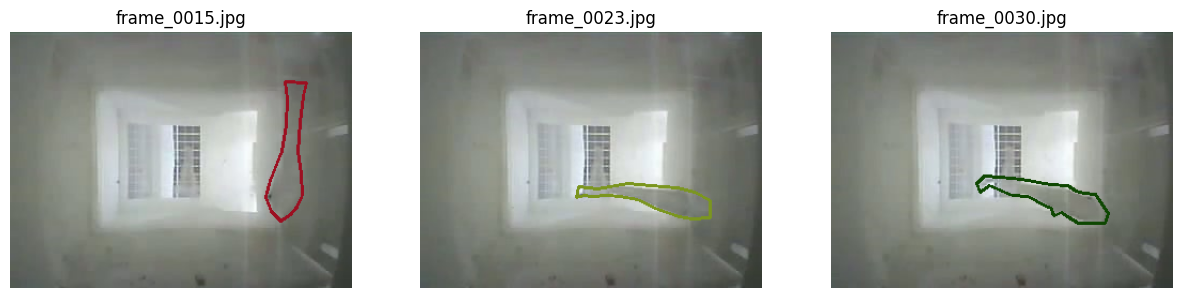

In [ ]:
# polygon_visualization.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def visualize_polygons(dataset_root='/content/my_dataset', num_samples=3):
    img_dir = os.path.join(dataset_root, 'images', 'train')
    label_dir = os.path.join(dataset_root, 'labels', 'train')

    # Get all image files with corresponding labels
    valid_images = []
    for img_file in os.listdir(img_dir):
        base_name = os.path.splitext(img_file)[0]
        label_path = os.path.join(label_dir, f"{base_name}.txt")
        if os.path.exists(label_path):
            valid_images.append(img_file)

    num_samples = min(num_samples, len(valid_images))
    if num_samples == 0:
        print("❌ No labeled images found!")
        return

    # Randomly pick samples
    sampled_images = random.sample(valid_images, num_samples)

    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(sampled_images):
        base_name = os.path.splitext(img_file)[0]
        img_path = os.path.join(img_dir, img_file)
        label_path = os.path.join(label_dir, f"{base_name}.txt")

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        with open(label_path) as f:
            lines = f.readlines()

        # Draw polygons
        for line in lines:
            parts = line.strip().split()
            if len(parts) < 6:
                continue  # not a valid polygon
            coords = np.array(list(map(float, parts[1:])))
            polygon = coords.reshape(-1, 2) * [w, h]

            color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
            cv2.polylines(img, [polygon.astype(int)], True, color, 2)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(img_file)
        plt.axis('off')

    plt.show()

if __name__ == "__main__":
    visualize_polygons()


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# 1. FIRST create the model instance
model = YOLO('yolov8n-seg.pt')  # For segmentation

# 2. THEN train the model
results = model.train(
    data="/content/my_dataset/data.yaml",
    epochs=100,
    imgsz=240,
    batch=16,
    name="fish_320x240",
    augment=True,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/my_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=240, int8=False, iou=0.7, keras=False, kobj=1.0

In [ ]:
results = model.train(
    data="/content/my_dataset/data.yaml",
    epochs=100,
    imgsz=240,
    batch=16,
    name="fish_320x240",
    augment=True,
)


NameError: name 'model' is not defined

In [ ]:
from ultralytics import YOLO

# Load the best model from training
model = YOLO('runs/segment/fish_320x240/weights/best.pt')

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
# Replace with your video path
video_path = '/content/fish_video.mp4'

# Run prediction (automatically saves output)
results = model.predict(
    source=video_path,
    conf=0.5,          # Confidence threshold
    save=True,         # Save output video
    show_labels=True,  # Display class labels
    show_conf=True,    # Display confidence scores
    line_width=2,      # Polygon line thickness
)

NameError: name 'model' is not defined

In [ ]:
!ffprobe -v error -select_streams v:0 -show_entries stream=width,height -of csv=p=0 /content/fish_video.mp4
!ffprobe -v error -select_streams v:0 -show_entries stream=width,height -of csv=p=0 /content/runs/segment/predict/fish_video.avi

320,240
320,240


In [ ]:
from google.colab import files
files.download('/content/runs/segment/predict/fish_video.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
from pathlib import Path

# Define paths
model_path = Path("/content/runs/segment/fish_320x240")
drive_path = Path("/content/drive/MyDrive/fish_detection_model")

# Copy entire training results to Google Drive
if model_path.exists():
    shutil.copytree(model_path, drive_path, dirs_exist_ok=True)
    print("✅ Model saved to Google Drive!")
else:
    print("❌ Model directory not found. Checking alternative locations...")

    # Check for other possible locations
    possible_paths = [
        "/content/runs/segment/train",
        "/content/runs/segment/fish_320_240",
        "/content/runs/segment/latest"
    ]

    for path in possible_paths:
        if Path(path).exists():
            shutil.copytree(path, drive_path, dirs_exist_ok=True)
            print(f"✅ Found and saved model from {path}")
            break
    else:
        print("❌ Could not find model directory")

✅ Model saved to Google Drive!


In [ ]:
from google.colab import files
from pathlib import Path
import zipfile

# Create a zip file of your model
model_path = Path("/content/runs/segment/fish_320x240")
zip_path = "/content/fish_model.zip"

if model_path.exists():
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in model_path.rglob('*'):
            zipf.write(file, file.relative_to(model_path.parent))

    # Download the zip file
    files.download(zip_path)
    print("✅ Model zip file downloaded!")
else:
    print("❌ Model directory not found")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model zip file downloaded!
